# Observations and Insights
The population of mice in the study are equally distributed between males and females.

The drug regimens with highest number of observations are Capomulin and Ramicane

...

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on ='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_data['Mouse ID'])

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID.

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data2 = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'])
combined_data2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_data2['Mouse ID'])

1888

# Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimens = combined_data2.groupby(["Drug Regimen"])

tumor_summary_df = pd.DataFrame({
    "Tumor Mean": drug_regimens['Tumor Volume (mm3)'].mean(),
    "Tumor Median": drug_regimens['Tumor Volume (mm3)'].median(),
    "Tumor Variance": drug_regimens['Tumor Volume (mm3)'].var(),
    "Tumor Std Dev": drug_regimens['Tumor Volume (mm3)'].std(),
    "Tumor SEM": drug_regimens['Tumor Volume (mm3)'].sem()})
tumor_summary_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# find an aggregation of column "Tumor Volume (mm3), grouped by Drug Regimen" 

#combined_data_agg.groupby(["Drug Regimen"]
                          #.agg(\Tumor_Mean=('Tumor Volume (mm3)', np.mean),\Tumor_Median=('Tumor Volume (mm3)',np.median)
                               #\Tumor_Variance=('Tumor Volume (mm3)',np.var)
                              # \Tumor_StdDev=('Tumor Volume (mm3)',np.std)
                               #\Tumor_SEM=('Tumor Volume (mm3)',st.sem))
#combined_data_agg.df = pd.DataFrame(combined_data_agg)
#combined_data_agg.df

# Bar and Pie Charts

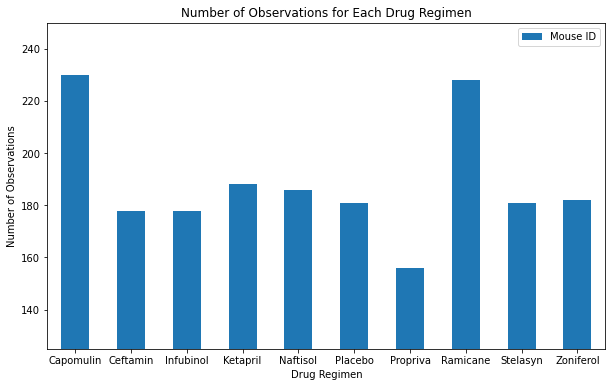

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Filtering the DataFrame to only chart Drug Regimens and the number of meansurements for each
regimen_count = drug_regimens['Mouse ID'].count()

# drug_regimens is grouped by Drug Regimen and they will be used as the label

regimen_count.plot(kind='bar', figsize=(10,6), rot=0)
plt.ylim(125, 250)
plt.ylabel("Number of Observations")
plt.title("Number of Observations for Each Drug Regimen")
plt.legend()
plt.show()

<Figure size 5040x3600 with 0 Axes>

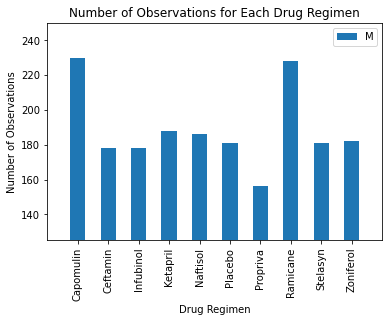

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimens_count = combined_data2.groupby("Drug Regimen").count()['Tumor Volume (mm3)']
drug_regimens_count_df = pd.DataFrame(drug_regimens_count)

plt.figure(figsize=(70,50))
plt.xdata = drug_regimens_count_df.plot.bar(legend=False)
plt.xlim(-1, len(drug_regimens_count))
plt.ylim(125, 250)
#plt.xticks(rotation='horizontal')
plt.title("Number of Observations for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")

plt.legend('Mouse ID')
plt.show()

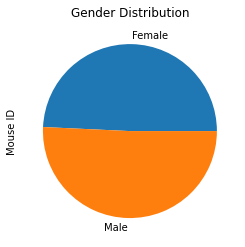

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Determine the distribution of females versus males
gender_counts = combined_data2.groupby('Sex')['Mouse ID'].count()

# Create a pie chart of the Gender Distribution 
gender_pie_plot = gender_counts.plot.pie(y='Sex', title = 'Gender Distribution')

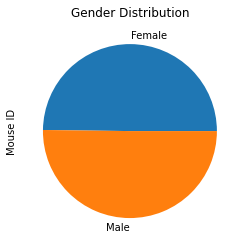

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Determine the distribution of females versus males and create a DataFrame
gender_counts = combined_data2.groupby('Sex')['Mouse ID'].nunique()
gender_counts_df = pd.DataFrame(gender_counts)
gender_counts_df

# Create a pie chart of the Gender Distribution 

plt.pie(gender_counts, labels=gender_counts.index);
plt.title('Gender Distribution')
plt.ylabel('Mouse ID')
plt.show()

# Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_regimens = combined_data2[combined_data2['Drug Regimen'].isin(four_regimens_list)]

# Start by getting the last (greatest) timepoint for each mouse
four_best_timepoint = four_regimens.groupby("Mouse ID").last()['Timepoint']
four_best_timepoint_df = pd.DataFrame(four_best_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
promising_regimens_merged = pd.merge(four_best_timepoint_df, combined_data2, how = 'left', on =('Mouse ID', 'Timepoint')).sort_values(['Drug Regimen'])

promising_regimens_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
49,l897,45,Capomulin,Male,17,19,38.846876,1
34,j119,45,Capomulin,Female,7,23,38.125164,1
35,j246,35,Capomulin,Female,21,21,38.753265,1
78,u364,45,Capomulin,Male,18,17,31.023923,3
26,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes, 
# and reformat using Drug Regimens as columns and use the last tumor volume reading as an index
promising_regimens = four_regimens.groupby(['Drug Regimen','Mouse ID']).agg(Last_Tumor_Reading=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
promising_regimens_unstack = promising_regimens.stack(level=0).unstack(level=0)

for drug in four_regimens_list:
    quartiles = promising_regimens_unstack[drug].quantile([.25, .5, .75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f'---------------------------------------------')
    

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
---------------------------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
---------------------------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
---------------------------------------------
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The 

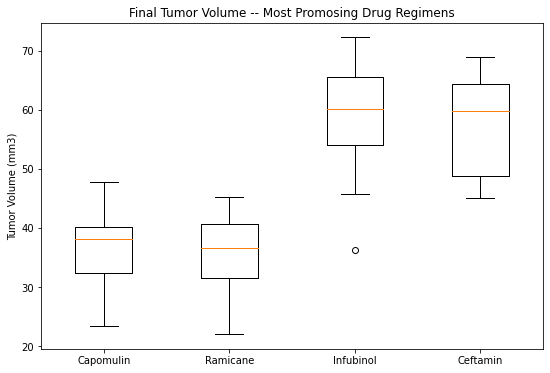

In [16]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Put treatments into a list for for loop (for plot labels)
for drug in four_regimens_list:
    tumor_vols.append(list(promising_regimens_unstack[drug].dropna()))
      
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,6))
ax.set_title('Final Tumor Volume -- Most Promosing Drug Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_vols)
plt.xticks([1,2,3,4],four_regimens_list)
plt.show()

# Line and Scatter Plots

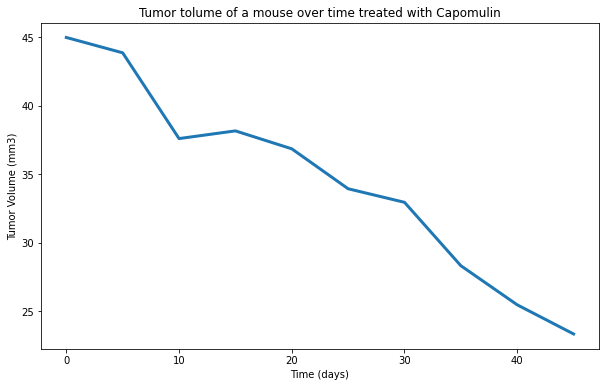

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_volume = (combined_data2['Tumor Volume (mm3)'][10:20].to_list())
mouse_time = (combined_data2['Timepoint'][10:20].to_list())

plt.figure(figsize=(10,6))
plt.plot(mouse_time, mouse_volume, linewidth=3)
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor tolume of a mouse over time treated with Capomulin")
plt.show()

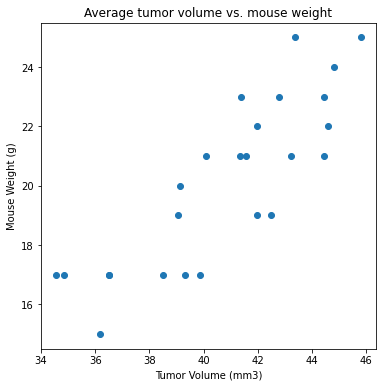

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a list of grouped mice
grouped_mice = combined_data2.groupby(['Mouse ID'])

# Create variables to/and peform calculations to determine average volume and mouse weight
capomulin_mice = combined_data2[combined_data2['Drug Regimen'] == 'Capomulin']
capomulin_mice_id = capomulin_mice['Mouse ID'].unique()
capomulin_mice_avg_vol = pd.Series([grouped_mice.get_group(m)['Tumor Volume (mm3)'].mean() for m in capomulin_mice_id])
capomulin_mice_weight = pd.Series([grouped_mice.get_group(m)['Weight (g)'].sum()/grouped_mice.get_group(m)['Weight (g)'].count() for m in capomulin_mice_id])

# Create the scatter plot
plt.figure(figsize=(6,6))
plt.scatter(capomulin_mice_avg_vol, capomulin_mice_weight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Average tumor volume vs. mouse weight")
plt.show()

# Correlation and Regression

The R-Value between Mouse Weights and Tumor Volumes is 0.84 for Capomulin Mice.


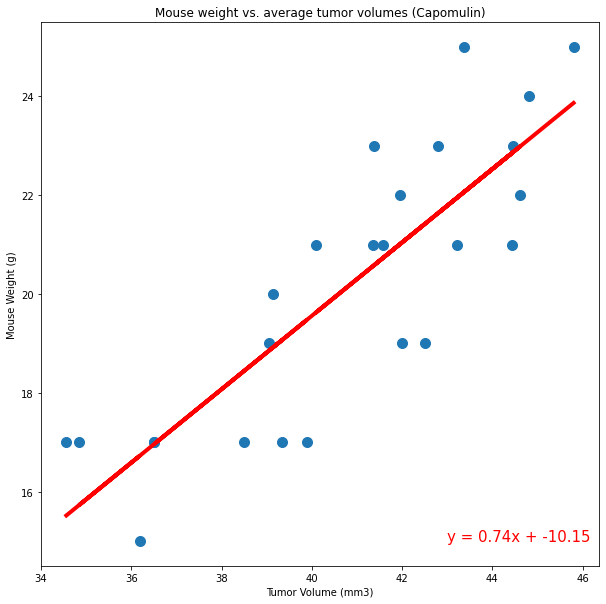

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_mice_avg_vol
y_values = capomulin_mice_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
print(f"The R-Value between Mouse Weights and Tumor Volumes is {round(r_value,2)} for Capomulin Mice.")

plt.figure(figsize=(10,10))
plt.scatter(x_values,y_values,s=100)
plt.plot(x_values,regress_values,"r-",linewidth=4)
plt.annotate(line_eq,(43,15),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.title("Mouse weight vs. average tumor volumes (Capomulin)")
plt.show()